# Tapşırıq 4.

## İl ərzində ən çox satılan top 10 məhsulu və satış sayını hazırlayın. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("esas_mehsullar.csv")
df = data.copy()
df.head()

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
0,0,577571,3334,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Məişət məhsulları,3.68,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
1,1,577571,4674,TAXTA BICAQ 3232,Qab-qacaq,2.25,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
3,3,577571,6017,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
4,4,577571,8297,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Məişət məhsulları,2.92,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)


In [3]:
# satish_tarixi sütununu səliqəyə salmaq və tarix tipli dəyişənə çevirmək

df["satish_tarixi"] = df["satish_tarixi"].transform(lambda x: x.replace("T"," ")).astype("datetime64")

In [4]:
df.head()

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
0,0,577571,3334,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Məişət məhsulları,3.68,2019-07-19 12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
1,1,577571,4674,TAXTA BICAQ 3232,Qab-qacaq,2.25,2019-07-19 12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,2019-07-19 12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
3,3,577571,6017,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19 12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
4,4,577571,8297,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Məişət məhsulları,2.92,2019-07-19 12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)


In [5]:
print("Minimum tarix: ",df["satish_tarixi"].min())
print("Maximum tarix: ",df["satish_tarixi"].max())

Minimum tarix:  2019-01-01 01:51:00
Maximum tarix:  2019-11-01 04:48:00


In [6]:
# ən çox satılan 10 məhsul


top_10 = df["mehsul_ad"].value_counts().nlargest(10)
top_10

ATENA 1KG BEYAZ PENDIR PL/Q               180
LIPTON 330ML ICE TEA LIMON D/Q            177
SIRAB 0.5LT QAZSIZ SU PL/Q                171
LIPTON 330ML ICE TEA SAFTALI D/Q          169
FASTER 250ML ENERGY DRINK D/Q             165
SIRAB 1.5LT SU QAZSIZ MINERAL PL/Q        160
ETI 50GR CRAX KREKER PENDIR VE SOGANLI    145
HES 9KG CAMASIR TOZU MATIC BAHAR          143
NATURA 200ML MULTIMEYVE SIRESI            142
VANISH AGARDICI 100ML                     141
Name: mehsul_ad, dtype: int64

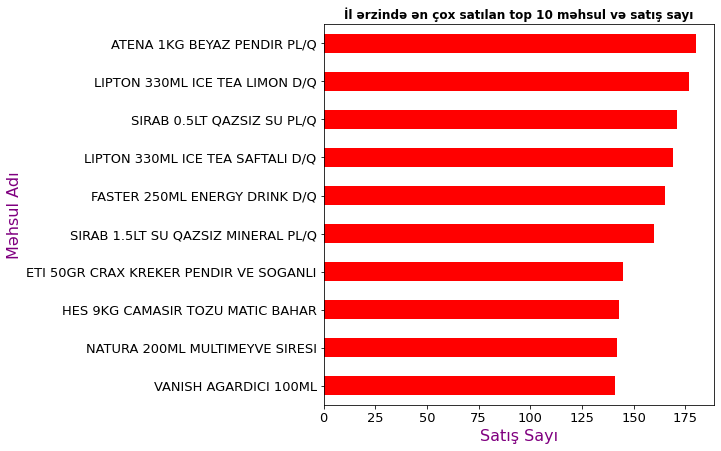

In [7]:
# qrafiklə göstərmək

plt.figure(figsize = (7,7))
plt.xlabel("Satış Sayı", fontsize = 16, color = "purple")
plt.ylabel("Məhsul Adı", fontsize = 16, color = "purple")
plt.title("İl ərzində ən çox satılan top 10 məhsul və satış sayı",fontweight="bold")
top_10.sort_values(ascending = True).plot.barh(color = "red", fontsize = 13);